# Exploration et analyse de données via Pandas

<table>
<tr>
    <td><img src="./images/pandas.png" alt="Pandas Logo" width="400"/></td>
    <td><img src="./images/seaborn.svg" alt="Seaborn Logo" width="400"/></td>
</tr>
</table>


Ce notebook offre une introduction pratique à la bibliothèque pandas en Python. Il couvre les concepts fondamentaux de la manipulation et de l'analyse de données à l'aide de pandas, incluant le chargement de données, l'exploration et les statistiques descriptives. Nous utiliserons un jeu de données sur les diamants pour illustrer ces fonctionnalités essentielles.

<hr style="border: 2px solid black;">

## step 1: Download the data : 
The datasets used here can be found in https://github.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/tree/master/datasets.

documentation on pandas can be found here: https://pandas.pydata.org/docs/
seaborn documentation can be found here: https://seaborn.pydata.org/

<hr style="border: 2px solid black;">

## Step 2: Import needed libraries



In [1]:
# import pandas libraries and visualization library seeborn
import pandas as pd
import seaborn as sns

<hr style="border: 2px solid black;">

## Step 3  Describing data with pandas : 

<hr style="border: 2px solid black;">

La bibliothèque pandas est un outil open source extrêmement puissant pour gérer, manipuler et analyser des données structurées. Les tableaux de données peuvent être stockés dans l'objet DataFrame disponible dans pandas, et des données dans divers formats (par exemple, .csv, .tsv, .xlsx, et .json) peuvent être lues directement dans un DataFrame. En utilisant des fonctions intégrées, les DataFrames peuvent être manipulés efficacement (par exemple, convertir des tableaux entre différentes vues, comme longues/larges ; regrouper par une colonne/caractéristique spécifique ; résumer les données ; et plus encore).

In [10]:
# you can either read the data directly from github or you can download it and 
# include its path, the dataset is also available in seaborn which means 
# you can read it via: diamonds_df = sns.load_dataset('diamonds')

#URL of the dataset: Download the dataset 
#diamonds_url = "./diamonds.csv"
#diamonds_df = pd.read_csv(diamonds_url)
#diamonds_df

diamonds_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/diamonds.csv"
diamonds_df = pd.read_csv(diamonds_url)
diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 3.1 Observing and Describing Data

Pour observer et décrire les données d'un dataset en utilisant pandas , une méthode très utile est la fonction head(). Cette fonction permet d'afficher les premières lignes du DataFrame, ce qui est pratique pour avoir un aperçu rapide des données. Par défaut, elle affiche 5 lignes. Pour ajuster cela, nous pouvons utiliser l'argument n ; par exemple, head(n=5). Voici quelques points clés à retenir :

In [6]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<font color="#008000">  **Pourriez-vous spécifier les différents types de données dans toutes les colonnes ?** <\font> 

Les données contiennent différentes caractéristiques des diamants, telles que **carat** , **cut quality** , **color**, et **price** , sous forme de colonnes. Maintenant, **cut** , **clarity** , et **color** sont des variables catégorielles, tandis que x , y , z , depth , table , et price sont des variables continues. Alors que les variables catégorielles prennent des catégories/noms uniques comme valeurs, les variables continues prennent des nombres réels comme valeurs.

cut , color , et clarity sont des variables ordinales avec respectivement 5, 7 et 8 valeurs uniques (cela peut être obtenu en utilisant diamonds_df.cut.nunique() , diamonds_df.color.nunique() , diamonds_df.clarity.nunique() – essayez !). cut représente la qualité de la taille, décrite comme Fair (Passable), Good (Bon), Very Good (Très bon), Premium (Premium), ou Ideal (Idéal) ; color décrit la couleur du diamant de J (pire) à D (meilleur). Il y a aussi clarity , qui mesure la clarté du diamant – les degrés vont de I1 (pire), SI1, SI2, VS1, VS2, VVS1, VVS2, à IF (meilleur).

<font color="#008000">  **Comptez le nombre de lignes et de colonnes dans le DataFrame en utilisant la fonction**

In [15]:
diamonds_df.shape

(53940, 10)

Résumez les colonnes en utilisant describe() pour obtenir la distribution des variables, incluant la moyenne, la médiane, le minimum, le maximum et les différents quartiles :

In [9]:
# the describe function as is will only describe numeric values 
# to include categorical use diamonds_df.describe(include=object)
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
diamonds_df.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


<font color="#008000"> **Sélectionner des colonnes d'un DataFrame. **</font>


Pour sélectionner des colonnes spécifiques d'un jeu de données (DataFrame) Pandas, deux méthodes principales sont disponibles : l'opérateur point (`.`) et l'opérateur crochets (`[]`).

**Accès simple :**

Par exemple, pour accéder à la colonne nommée `cut` du DataFrame `diamonds_df`, vous pouvez utiliser :

```python
diamonds_df.cut

# ou 
diamonds_df['cut']
```

Cas où l'opérateur point (.) ne peut pas être utilisé :

L'opérateur point est pratique, mais il présente des limitations dans certains cas :

Noms de colonnes contenant des espaces : Si un nom de colonne inclut des espaces (par exemple, 'prix au carat'), vous devez impérativement utiliser la notation avec les crochets :

```python
diamonds_df['prix au carat']
```

Noms de colonnes entiers : Lorsque le nom d'une colonne est un nombre entier (par exemple, 2023), l'accès via l'opérateur point n'est pas valide. Utilisez les crochets :

```python
diamonds_df[2023]
```

Création de nouvelles colonnes : Pour ajouter une nouvelle colonne au DataFrame, la notation avec les crochets est la méthode standard :

```python
diamonds_df['nouvelle_colonne'] = ...
diamonds_df['une autre colonne'] = ...
```



Maintenant, nous allons examiner l'ajout conditionnel de colonnes. Essayons d'ajouter une colonne basée sur la valeur de `price_per_carat`. Disons que toute valeur supérieure à 3500 sera considérée comme "élevée" (codée par 1) et toute valeur inférieure à 3500 sera considérée comme "faible" (codée par 0).

In [16]:
#Operations on Dataframes: 

import numpy as np
diamonds_df['price_per_carat'] = diamonds_df['price']/diamonds_df['carat']

np.where(diamonds_df['price_per_carat']>3500,1,0)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat_is_high,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,1080.645161


<hr style="border: 2px solid black;">


 ##                         Exercice de laboratoire : Tracer et analyser un histogramme


**Objectif** : Dans cet exercice, vous allez créer et analyser des histogrammes pour comprendre la distribution du poids en carats dans le jeu de données des diamants.

**Matplotlib**
- est une bibliothèque de traçage (plotting) disponible dans la plupart des distributions Python et constitue la base de plusieurs packages de traçage.
- matplotlib compris la fonctionnalité de traçage intégrée de pandas et seaborn. 
- Matplotlib permet de contrôler chaque aspect d'une figure et est connu pour être verbeux. Les fonctions de visualisation de seaborn et pandas sont toutes deux construites sur matplotlib. 


**Pandas**
pandas est une bibliothèque puissante d'analyse et de manipulation de données. Elle fournit des structures de données comme le DataFrame, qui est essentiel pour travailler avec des données structurées. L'outil de traçage intégré de pandas est un outil exploratoire utile pour générer des figures qui ne sont pas prêtes pour une présentation finale mais utiles pour comprendre l'ensemble de données sur lequel vous travaillez. 


**Seaborn**
- Seaborn, possède des API pour dessiner une grande variété de tracés esthétiquement agréables.seaborn est une bibliothèque de visualisation de données Python basée sur Matplotlib. Elle fournit une interface de haut niveau pour1 créer des graphiques statistiques attrayants et informatifs



**Pour illustrer certains concepts clés et explorer l'ensemble de données diamonds, nous commencerons par deux visualisations simples dans ce chapitre : les histogrammes et les diagrammes à barres.**

1. Pour cet exercice, créez un histogramme de la fréquence des diamants dans le jeu de données, en utilisant leurs spécifications de carat respectives sur l'axe des x
2.  Modifier le nombre de bins :
3. Comment l'augmentation du nombre de classes affecte-t-elle l'apparence de l'histogramme ?
4. Tracer un histogramme à l'aide de Seaborn :
5. Quelles sont les deux différences clés entre les histogrammes générés par la fonction .hist() de pandas et la fonction sns.distplot() de Seaborn ?
6. Qu'est-ce qu'une estimation de la densité du noyau (KDE) ? Que montre-t-elle ?
7. Appliquer une transformation logarithmique :


<hr style="border: 2px solid black;">


array([[<Axes: title={'center': 'carat'}>]], dtype=object)

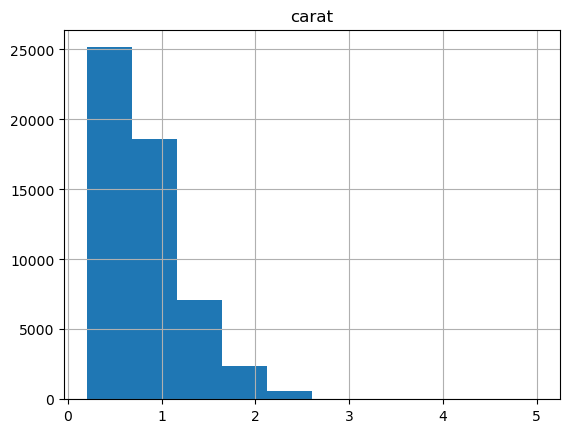

In [3]:
import seaborn as sns
import pandas as pd
diamonds_df = sns.load_dataset('diamonds')
diamonds_df.hist(column='carat')

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

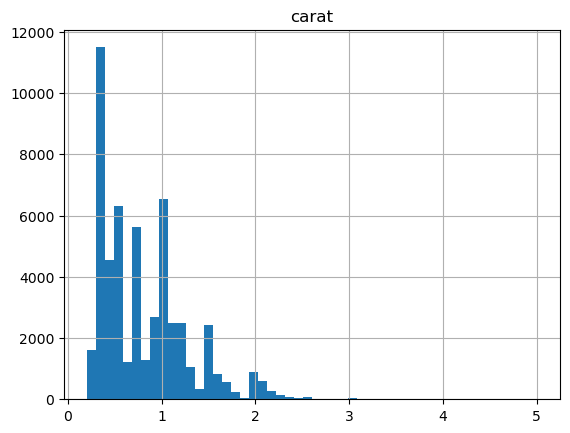

In [4]:
diamonds_df.hist(column='carat', bins=50)

L'augmentation du nombre de classes rend l'histogramme plus détaillé ou granulaire. Il montre davantage de fluctuations et de motifs plus fins dans la distribution des données.

/tmp/ipykernel_8922/3066889642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_df.carat)


<Axes: xlabel='carat', ylabel='Density'>

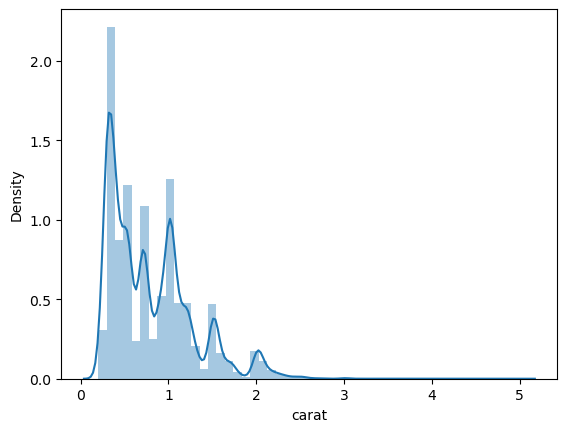

In [6]:
sns.distplot(diamonds_df.carat)


/tmp/ipykernel_8922/1232205780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_df.carat, kde=False)


<Axes: xlabel='carat'>

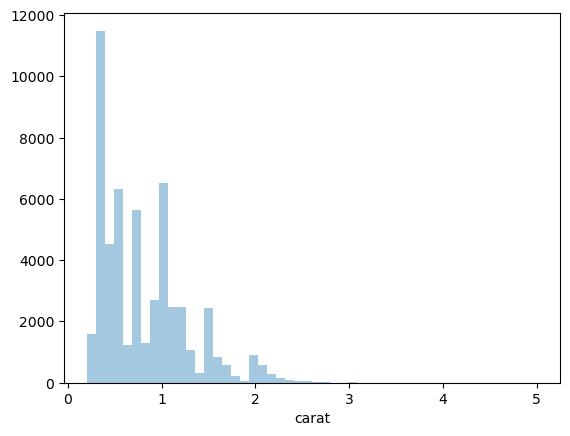

In [7]:
sns.distplot(diamonds_df.carat, kde=False)


/tmp/ipykernel_8922/1046684659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_df.carat, kde=False, bins=100)


<Axes: xlabel='carat'>

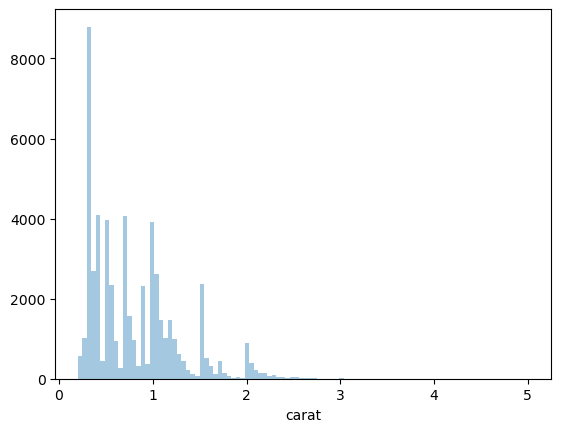

In [8]:
sns.distplot(diamonds_df.carat, kde=False, bins=100)


/tmp/ipykernel_8922/1859211707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(diamonds_df.price), kde=True)


<Axes: xlabel='price', ylabel='Density'>

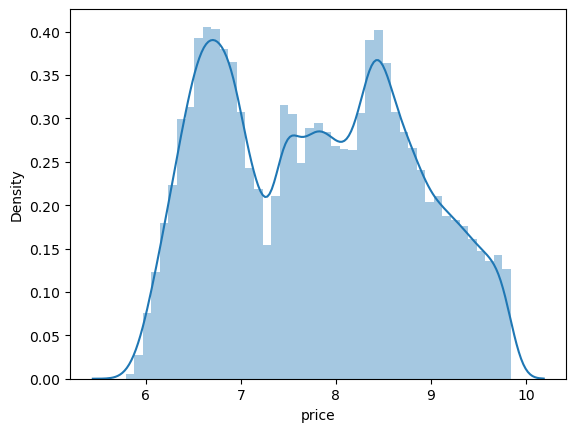

In [10]:
import numpy as np
sns.distplot(np.log(diamonds_df.price), kde=True)

<hr style="border: 2px solid black;">


- **Pourquoi une transformation logarithmique est-elle appliquée à la variable 'price' ?**
Une transformation logarithmique est souvent appliquée aux données asymétriques comme 'price' pour rendre la distribution plus symétrique et plus facile à analyser. Elle peut également aider à révéler des motifs qui ne sont pas apparents à l'échelle d'origine.
- **Quelles nouvelles informations l'histogramme transformé par logarithme révèle-t-il sur la distribution des prix des diamants ?**
L'histogramme transformé par logarithme révèle des pics distincts, suggérant des regroupements ou des catégories de prix potentiels pour les diamants. Cela pourrait indiquer différents segments de marché ou niveaux de qualité.
- **Identifiez les pics approximatifs dans la distribution des prix transformée par logarithme. Que pourraient suggérer ces pics sur le marché des diamants ?**
Le texte mentionne des concentration/groupment autour de 6,8 et entre 8,5 et 9 (sur l'échelle logarithmique). Ces groupment pourraient suggérer : Un group représente des diamants plus courants et moins chers. Un autre group représente un groupe de diamants plus chers, peut-être de meilleure qualité.

**Analyse et discussion :**

Sur la base de vos observations des histogrammes, répondez aux questions suivantes :

**Quelles sont les trois principales caractéristiques d'une distribution qui peuvent être identifiées à partir d'un histogramme ?**
- Forme : Asymétrie (symétrie), modalité (nombre de group) et forme générale.
- Centre : Où les données sont concentrées (par exemple, moyenne, médiane).
- Dispersion : Dans quelle mesure les données varient (par exemple, étendue, écart type).

**Expliquez comment le choix de la taille des bins peut influencer l'interprétation d'un histogramme.**
- Trop peu de bins peuvent simplifier excessivement les données, masquant des motifs importants. 
- Trop de classes peuvent rendre l'histogramme bruité et difficile à interpréter. La bonne taille de classe révèle la distribution sous-jacente.


<hr style="border: 2px solid black;">


<center> <h1> **Repeat the visualizations but with plotly**

<table>
<tr>
    <td><img src="./images/pandas.png" alt="Pandas Logo" width="400"/></td>
    <td><img src="./images/Plotly-logo.png" alt="plotly Logo" width="400"/></td>
</tr>
</table>

### Exercice de laboratoire : Tracer et analyser un histogramme

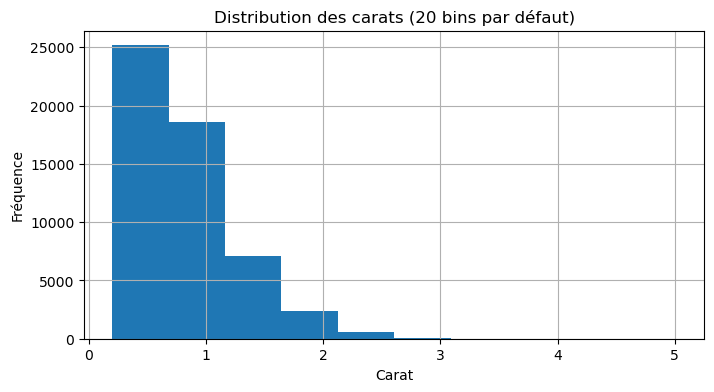

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset
diamonds_df = sns.load_dataset('diamonds')

# Histogramme simple avec Pandas
diamonds_df.hist(column='carat', figsize=(8, 4))
plt.title("Distribution des carats (20 bins par défaut)")
plt.xlabel("Carat")
plt.ylabel("Fréquence")
plt.show()

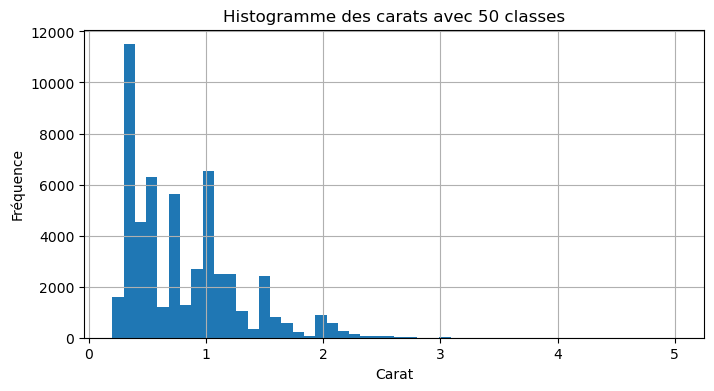

In [7]:
# Histogramme avec 50 classes
diamonds_df.hist(column='carat', bins=50, figsize=(8, 4))
plt.title("Histogramme des carats avec 50 classes")
plt.xlabel("Carat")
plt.ylabel("Fréquence")
plt.show()

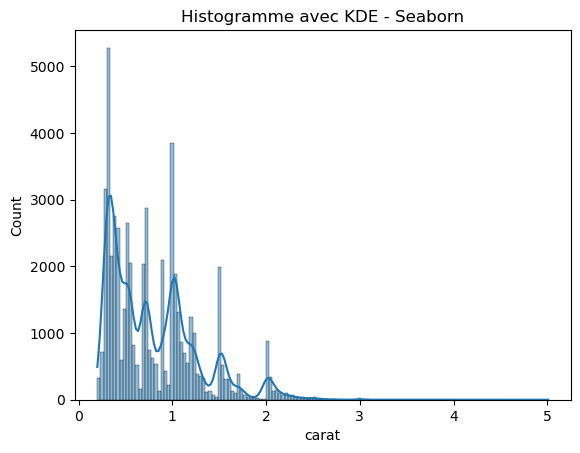

In [9]:
# Histogramme avec KDE activée (par défaut)
sns.histplot(diamonds_df.carat, kde=True)
plt.title("Histogramme avec KDE - Seaborn")
plt.show()

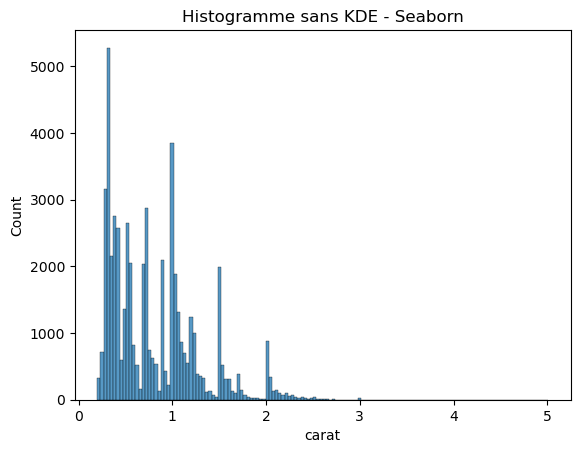

In [11]:
# Histogramme avec KDE désactivée
sns.histplot(diamonds_df.carat, kde=False)
plt.title("Histogramme sans KDE - Seaborn")
plt.show()

### Questions d’analyse

1. **Différences entre `.hist()` de Pandas et `sns.histplot()` de Seaborn :**  
   - Seaborn applique des styles plus esthétiques et propose KDE en option.  
   - Pandas est plus rapide pour une exploration simple, mais offre moins de personnalisation.

2. **KDE (Estimation de Densité du Noyau) :**  
   - Une courbe lisse qui estime la **distribution de probabilité** des données.  
   - Elle montre **où les valeurs sont concentrées**, au lieu de simplement compter des fréquences.

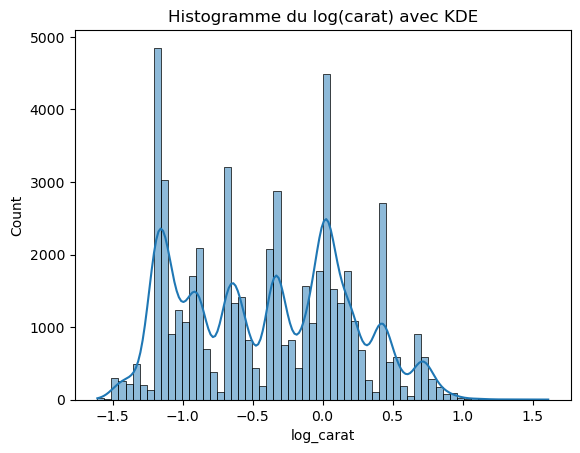

In [16]:
import numpy as np

# Ajouter une colonne transformée
diamonds_df['log_carat'] = np.log(diamonds_df['carat'])

# Histogramme du log(carat)
sns.histplot(diamonds_df['log_carat'], kde=True)
plt.title("Histogramme du log(carat) avec KDE")
plt.show()